In [14]:
# =====================================================
# 🎯 1. Importer les bibliothèques
# =====================================================
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# =====================================================
# 🎯 2. Charger les données test
# =====================================================
X_test = np.load("UCSDped1_Test.npy")  # adapte le nom si besoin
X_test = X_test.reshape(-1, 64, 64, 1)
print("Shape des données test:", X_test.shape)

Shape des données test: (7200, 64, 64, 1)


In [16]:
# =====================================================
# 🎯 3. Charger le modèle entraîné
# =====================================================
autoencoder = load_model("cae_ucsdped1.h5")
print("Modèle chargé.")

# =====================================================
# 🎯 4. Reconstruire les images
# =====================================================
X_recon = autoencoder.predict(X_test)
print("Reconstructions terminées.")

Modèle chargé.
225/225 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step
Reconstructions terminées.


In [19]:
# =====================================================
# 🎯 5. Calculer l'erreur de reconstruction
# =====================================================
reconstruction_error = np.mean(np.abs(X_test - X_recon), axis=(1,2,3))

# Afficher quelques erreurs pour vérifier
print("Erreurs de reconstruction (premières images):")
print(reconstruction_error[:10])


Erreurs de reconstruction (premières images):
[0.03544767 0.03458215 0.03375535 0.03378669 0.03452863 0.034576
 0.03476992 0.03419167 0.03382887 0.03387444]


In [18]:
# =====================================================
# 🎯 6. Définir un seuil automatique
# =====================================================
mean_error = np.mean(reconstruction_error)
std_error = np.std(reconstruction_error)
threshold = mean_error + 3 * std_error

print(f"Seuil automatique fixé à : {threshold:.4f}")

Seuil automatique fixé à : 0.0459


In [20]:
# =====================================================
# 🎯 7. Prédire normal / anomalie
# =====================================================
pred_labels = (reconstruction_error > threshold).astype(int)
# 0 = normal, 1 = anomalie

# Résumé
n_anomalies = np.sum(pred_labels)
n_normals = len(pred_labels) - n_anomalies
print(f"Nombre d'images normales détectées : {n_normals}")
print(f"Nombre d'anomalies détectées : {n_anomalies}")

Nombre d'images normales détectées : 7162
Nombre d'anomalies détectées : 38


Affichage de quelques résultats...


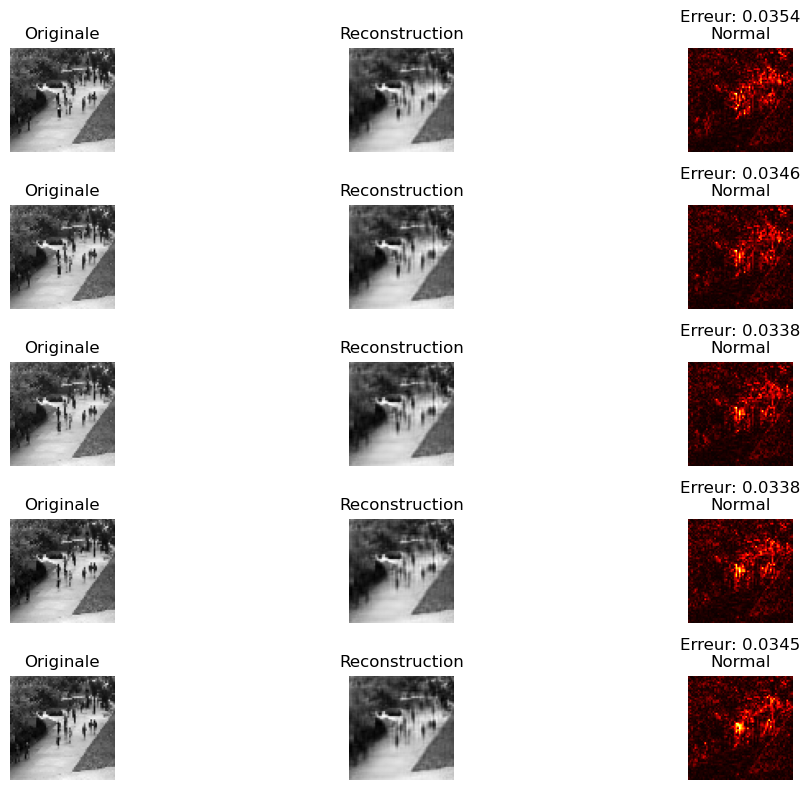

In [21]:
# =====================================================
# 🎯 8. Visualiser quelques exemples
# =====================================================
def plot_reconstructions(X_test, X_recon, errors, threshold, n=5):
    plt.figure(figsize=(12, 8))
    for i in range(n):
        # Image originale
        plt.subplot(n, 3, i*3+1)
        plt.imshow(X_test[i].squeeze(), cmap='gray')
        plt.title(f"Originale")
        plt.axis('off')

        # Reconstruction
        plt.subplot(n, 3, i*3+2)
        plt.imshow(X_recon[i].squeeze(), cmap='gray')
        plt.title("Reconstruction")
        plt.axis('off')

        # Heatmap d'erreur
        diff = np.abs(X_test[i] - X_recon[i])
        plt.subplot(n, 3, i*3+3)
        plt.imshow(diff.squeeze(), cmap='hot')
        lbl = "Anomalie" if errors[i]>threshold else "Normal"
        plt.title(f"Erreur: {errors[i]:.4f}\n{lbl}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

print("Affichage de quelques résultats...")
plot_reconstructions(X_test, X_recon, reconstruction_error, threshold, n=5)

In [22]:
X_test = np.load("UCSDped1_Test.npy")  # adapte le chemin
X_test = X_test.reshape(-1, 64, 64, 1)


In [23]:
from tensorflow.keras.models import load_model
autoencoder = load_model("cae_ucsdped1.h5")


In [24]:
X_recon = autoencoder.predict(X_test)


225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step


In [25]:
reconstruction_error = np.mean(np.abs(X_test - X_recon), axis=(1,2,3))


In [31]:
mean_err = np.mean(reconstruction_error)
std_err = np.std(reconstruction_error)
threshold = 0.55  # Mets une valeur plus basse que celle automatique
pred_labels = (reconstruction_error > threshold).astype(int)
print(f"Nombre d'anomalies détectées avec seuil {threshold} :", pred_labels.sum())

Nombre d'anomalies détectées avec seuil 0.55 : 0


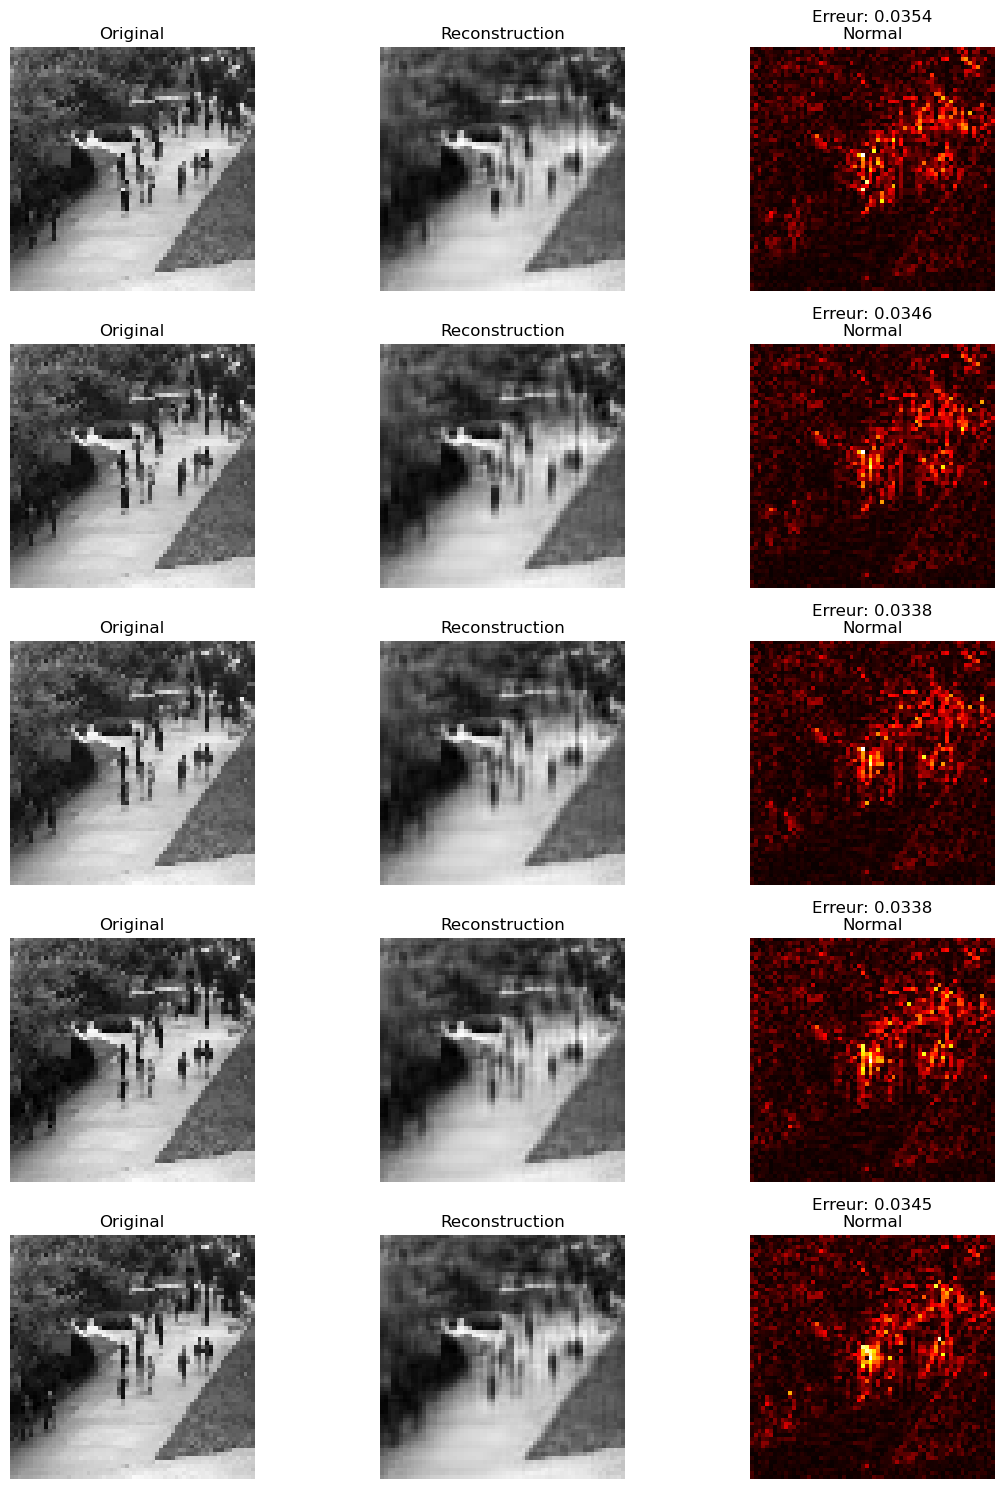

In [29]:
import matplotlib.pyplot as plt

def plot_results(X_test, X_recon, errors, threshold, n=5):
    plt.figure(figsize=(12, n*3))
    for i in range(n):
        plt.subplot(n, 3, i*3 + 1)
        plt.imshow(X_test[i].squeeze(), cmap='gray')
        plt.title('Original')
        plt.axis('off')

        plt.subplot(n, 3, i*3 + 2)
        plt.imshow(X_recon[i].squeeze(), cmap='gray')
        plt.title('Reconstruction')
        plt.axis('off')

        plt.subplot(n, 3, i*3 + 3)
        diff = np.abs(X_test[i] - X_recon[i])
        plt.imshow(diff.squeeze(), cmap='hot')
        label = "Anomalie" if errors[i] > threshold else "Normal"
        plt.title(f"Erreur: {errors[i]:.4f}\n{label}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_results(X_test, X_recon, reconstruction_error, threshold)


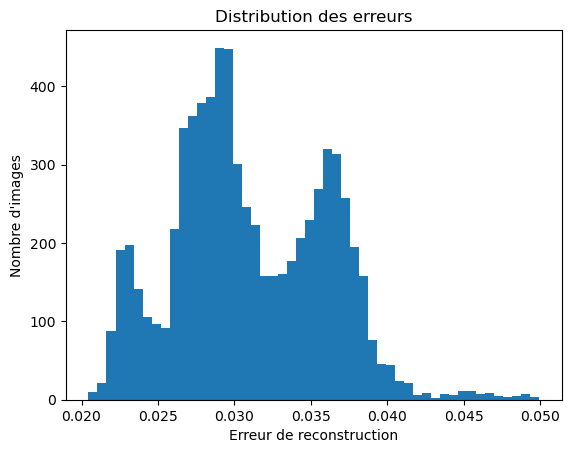

In [30]:
import matplotlib.pyplot as plt

plt.hist(reconstruction_error, bins=50)
plt.xlabel("Erreur de reconstruction")
plt.ylabel("Nombre d'images")
plt.title("Distribution des erreurs")
plt.show()


Entraînement CAE sur UCSDped1...
Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 126ms/step - loss: 0.6434 - val_loss: 0.5913
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 169ms/step - loss: 0.5860 - val_loss: 0.5890
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 190ms/step - loss: 0.5837 - val_loss: 0.5878
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 13s 138ms/step - loss: 0.5823 - val_loss: 0.5866
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 113ms/step - loss: 0.5814 - val_loss: 0.5859
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 13s 134ms/step - loss: 0.5807 - val_loss: 0.5853
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 12s 124ms/step - loss: 0.5800 - val_loss: 0.5850
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 12s 125ms/step - loss: 0.5797 - val_loss: 0.5846
Epoch 9/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 12s 127ms/step - loss: 0.5793 - val_loss: 0.5844
Epoch 10/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 119ms/step - loss: 0.5791 - val_loss: 0.5841
Epoch 11/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 14s 140ms/step - loss: 0.5786 - val_loss: 0.5838
Epoch 12

Modèle sauvegardé : cae_ucsdped1.h5
Entraînement CAE sur UCSDped2...
Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 129ms/step - loss: 0.6773 - val_loss: 0.6334
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - loss: 0.6338 - val_loss: 0.6293
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - loss: 0.6303 - val_loss: 0.6268
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 125ms/step - loss: 0.6283 - val_loss: 0.6258
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - loss: 0.6274 - val_loss: 0.6254
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - loss: 0.6270 - val_loss: 0.6249
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - loss: 0.6265 - val_loss: 0.6247
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - loss: 0.6264 - val_loss: 0.6244
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - loss: 0.6259 - val_loss: 0.6242
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - loss: 0.6259 - val_loss: 0.6240
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 190ms/step - loss: 0.6256 - 

Modèle sauvegardé : cae_ucsdped2.h5


225/225 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step
=== Résultats UCSDped1 ===
Seuil automatique: 0.0441
Images test: 7200
Anomalies détectées: 43
Images normales: 7157



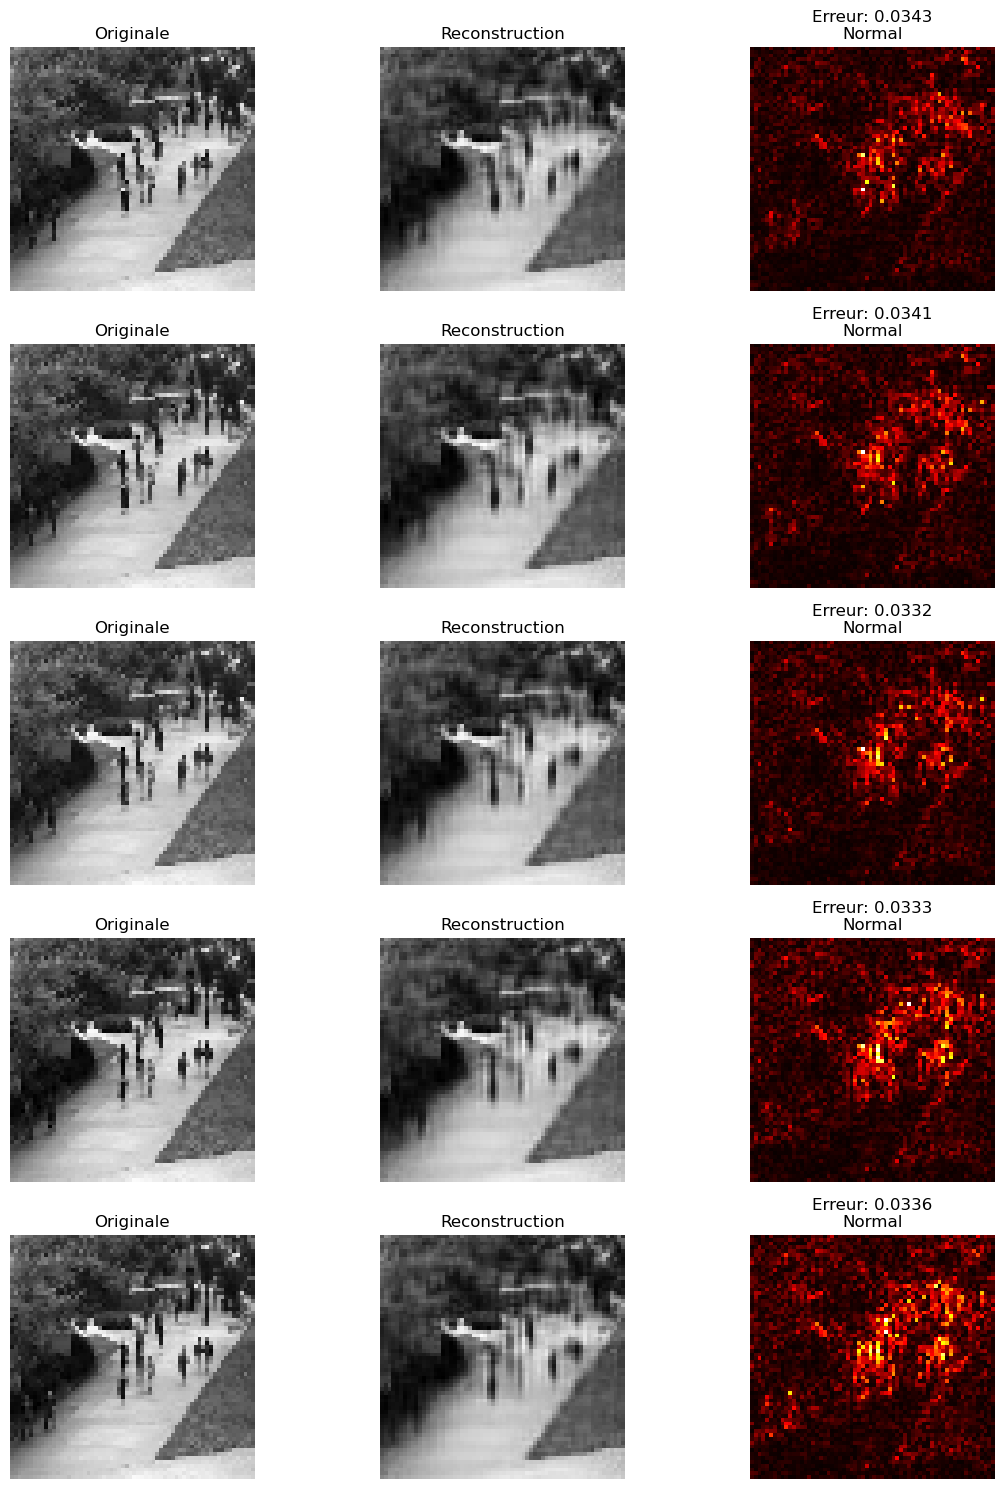

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step
=== Résultats UCSDped2 ===
Seuil automatique: 0.0340
Images test: 2010
Anomalies détectées: 0
Images normales: 2010



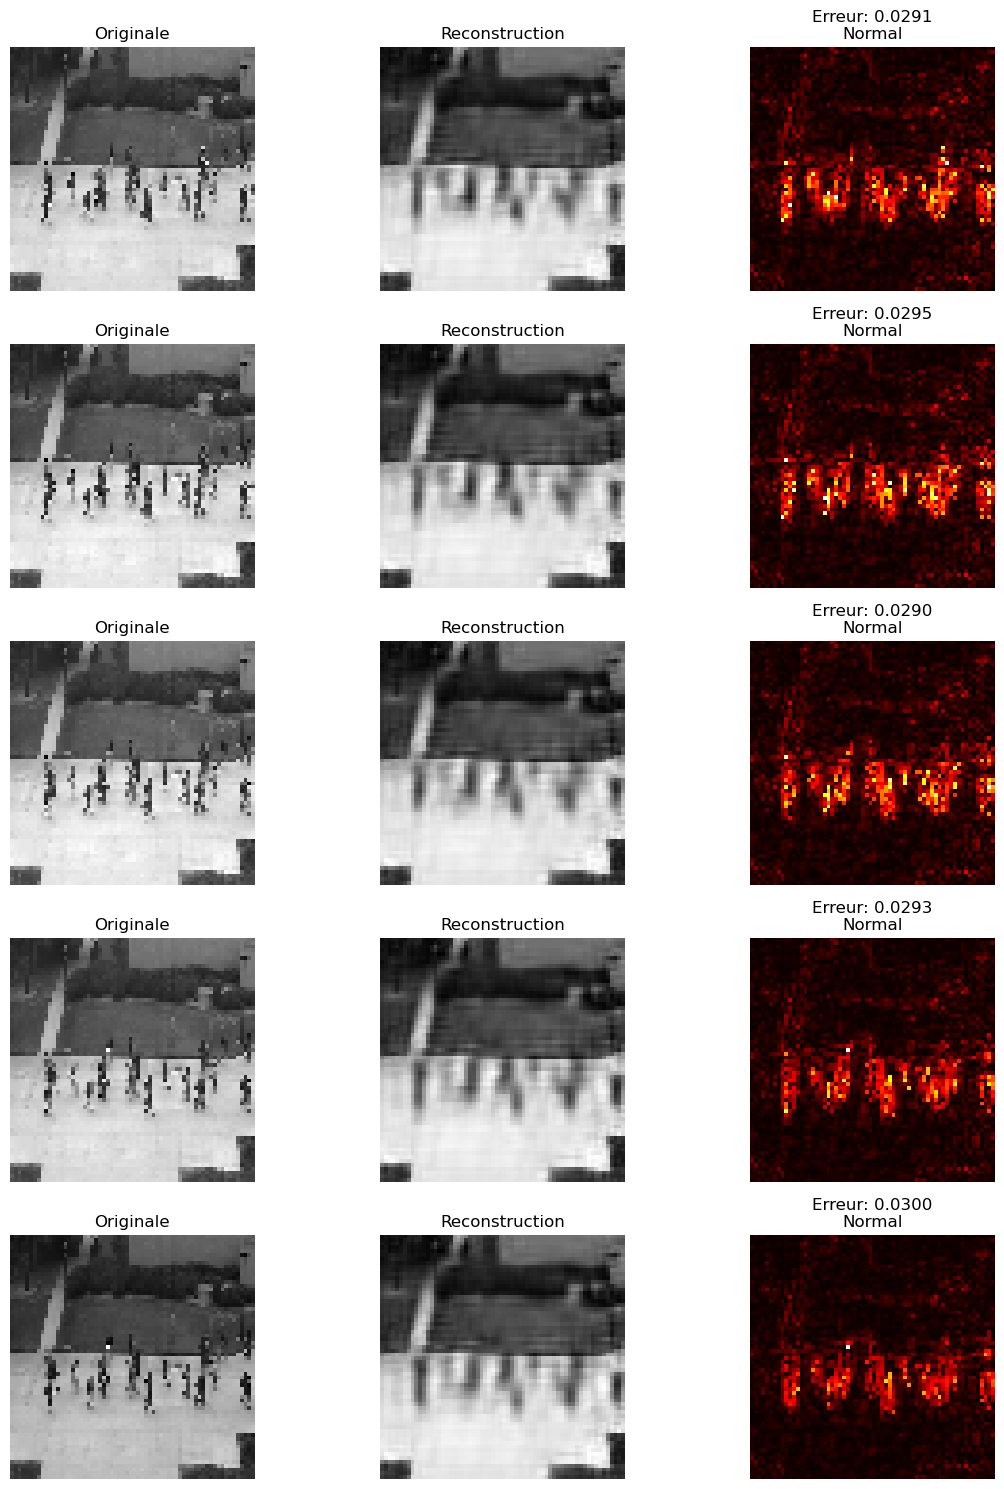

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


def create_autoencoder():
    input_img = Input(shape=(64,64,1))
    x = Conv2D(32, (3,3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2,2), padding='same')(x)
    x = Conv2D(16, (3,3), activation='relu', padding='same')(x)
    encoded = MaxPooling2D((2,2), padding='same')(x)

    x = Conv2D(16, (3,3), activation='relu', padding='same')(encoded)
    x = UpSampling2D((2,2))(x)
    x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
    x = UpSampling2D((2,2))(x)
    decoded = Conv2D(1, (3,3), activation='sigmoid', padding='same')(x)

    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer=Adam(1e-3), loss='binary_crossentropy')
    return autoencoder

def train_autoencoder(X_train, model_name):
    model = create_autoencoder()
    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    history = model.fit(
        X_train, X_train,
        epochs=50,
        batch_size=64,
        validation_split=0.1,
        shuffle=True,
        callbacks=[early_stop]
    )
    model.save(model_name + ".h5")
    print(f"Modèle sauvegardé : {model_name}.h5")
    return model


def test_and_detect(model_path, X_test, dataset_name):
    model = load_model(model_path)
    X_recon = model.predict(X_test)
    reconstruction_error = np.mean(np.abs(X_test - X_recon), axis=(1,2,3))
    
    mean_err = np.mean(reconstruction_error)
    std_err = np.std(reconstruction_error)
    threshold = mean_err + 3*std_err

    pred_labels = (reconstruction_error > threshold).astype(int)
    print(f"=== Résultats {dataset_name} ===")
    print(f"Seuil automatique: {threshold:.4f}")
    print(f"Images test: {len(X_test)}")
    print(f"Anomalies détectées: {pred_labels.sum()}")
    print(f"Images normales: {len(X_test) - pred_labels.sum()}\n")

    # Visualisation simple
    n = 5
    plt.figure(figsize=(12, n*3))
    for i in range(n):
        plt.subplot(n,3,i*3+1)
        plt.imshow(X_test[i].squeeze(), cmap='gray')
        plt.title("Originale")
        plt.axis('off')

        plt.subplot(n,3,i*3+2)
        plt.imshow(X_recon[i].squeeze(), cmap='gray')
        plt.title("Reconstruction")
        plt.axis('off')

        plt.subplot(n,3,i*3+3)
        diff = np.abs(X_test[i] - X_recon[i])
        plt.imshow(diff.squeeze(), cmap='hot')
        lbl = "Anomalie" if reconstruction_error[i] > threshold else "Normal"
        plt.title(f"Erreur: {reconstruction_error[i]:.4f}\n{lbl}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# --- Chargement données UCSDped1 ---
X_train_ped1 = np.load("UCSDped1_Train.npy").reshape(-1,64,64,1)
X_test_ped1 = np.load("UCSDped1_Test.npy").reshape(-1,64,64,1)

# --- Chargement données UCSDped2 ---
X_train_ped2 = np.load("UCSDped2_Train.npy").reshape(-1,64,64,1)
X_test_ped2 = np.load("UCSDped2_Test.npy").reshape(-1,64,64,1)

# --- Entraînement ---
print("Entraînement CAE sur UCSDped1...")
model_ped1 = train_autoencoder(X_train_ped1, "cae_ucsdped1")

print("Entraînement CAE sur UCSDped2...")
model_ped2 = train_autoencoder(X_train_ped2, "cae_ucsdped2")

# --- Test et détection ---
test_and_detect("cae_ucsdped1.h5", X_test_ped1, "UCSDped1")
test_and_detect("cae_ucsdped2.h5", X_test_ped2, "UCSDped2")
